In [2]:
from qutip import *
import matplotlib.pyplot as plt
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\envs\OpenQuantumSystems\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['identity', 'squeeze', 'info', 'shape']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [5]:
H = 0
   
c_ops = [np.sqrt(kappa) * a, np.sqrt(P)*a.dag()]
   
for n in range(N):
    H = H + we_list[n] * s[n].dag() * s[n] + g[n] * (a.dag() * s[n] + a * s[n].dag())
    c_ops.append(np.sqrt(gamma) * s[n])
spec = spectrum(H, w_list, c_ops, a.dag(), a)
spec = spec - min(spec)
spec = spec/max(spec)

spectrum_dat = spectrum_dat/max(spectrum_dat)
# cx.plot(w_list, spectrum_dat, 'r-', linewidth=2)
# cx.plot(w_list, spec, 'b-', linewidth=2)
# cx.tick_params(axis='both', which='major', labelsize=16)        
# cx.set_xlabel('$\omega/2\pi$ [GHz]',fontsize = 20)
# cx.set_ylabel('$S^{EFF}$ [GHz]',fontsize = 20)
# # cx.set_ylim([0,0.02])
# cx.set_yscale('log')

ValueError: max() arg is an empty sequence

In [15]:
cavdes = tensor(destroy(2), tensor(qeye(2), qeye(2)))
empty = tensor(qeye(2), tensor(qeye(2), qeye(2)))
s = []

sig1 = (tensor(qeye(2), tensor(destroy(2), qeye(2))))
sig2 = (tensor(qeye(2), tensor(qeye(2), destroy(2))))

s.append(tensor(sig1, empty))
s.append(tensor(sig2, empty))
s.append(tensor(empty, sig1))
s.append(tensor(empty, sig2))


a = []
a.append(tensor(cavdes, empty))
a.append(tensor(empty, cavdes))

In [16]:
we_list = [0,0,0,0]
we_list_spread = np.random.normal(0, scale = 5, size = 4)
g = 10
g_list = [g]*4
w_list = np.linspace(-20, 20, 200)
gamma = 0.1
J = 5
kappa = 5
spread = 5

In [ ]:
H = J*(a[0].dag()*a[1] + a[1].dag()*a[0]) + g*(s[0].dag()*a[0] + a[0].dag()*s[0]) + g*(s[1].dag()*a[0] + a[0].dag()*s[1]) + g*(s[2].dag()*a[1] + a[1].dag()*s[2]) + g*(s[3].dag()*a[1] + a[1].dag()*s[3])
c_ops = [np.sqrt(kappa)*a[0], np.sqrt(kappa)*a[1], np.sqrt(gamma)*s[0], np.sqrt(gamma)*s[1], np.sqrt(gamma)*s[2], np.sqrt(gamma)*s[3], np.sqrt(kappa/50)*a[0].dag()]
spec_kappa = spectrum(H, w_list, c_ops, a[1].dag(), a[1])

In [ ]:
H_spread = we_list_spread[0]*(s[0].dag()*s[0]) + we_list_spread[1]*(s[1].dag()*s[1]) + we_list_spread[2]*(s[2].dag()*s[2]) + we_list_spread[3]*(s[3].dag()*s[3]) + J*(a[0].dag()*a[1] + a[1].dag()*a[0]) + g*(s[0].dag()*a[0] + a[0].dag()*s[0]) + g*(s[1].dag()*a[0] + a[0].dag()*s[1]) + g*(s[2].dag()*a[1] + a[1].dag()*s[2]) + g*(s[3].dag()*a[1] + a[1].dag()*s[3])
c_ops = [np.sqrt(kappa)*a[0], np.sqrt(kappa)*a[1], np.sqrt(gamma)*s[0], np.sqrt(gamma)*s[1], np.sqrt(gamma)*s[2], np.sqrt(gamma)*s[3], np.sqrt(kappa/50)*a[0].dag()]
spec_spread_kappa = spectrum(H_spread, w_list, c_ops, a[1].dag(), a[1])

In [7]:
# np.savetxt('spectrum_5kappa_nospread', np.transpose([w_list, spec_kappa]))
np.savetxt('spectrum_5kappa_yesspread', np.transpose([w_list, spec_spread_kappa]))

In [ ]:

g = 10
g_list = [g]*4
w_list = np.linspace(-20, 20, 200)
gamma = 0.1
J = 5
kappa = 0
spread = 5
P = 0.1


In [ ]:
H = J*(a[0].dag()*a[1] + a[1].dag()*a[0]) + g*(s[0].dag()*a[0] + a[0].dag()*s[0]) + g*(s[1].dag()*a[0] + a[0].dag()*s[1]) + g*(s[2].dag()*a[1] + a[1].dag()*s[2]) + g*(s[3].dag()*a[1] + a[1].dag()*s[3])
c_ops = [np.sqrt(gamma)*s[0], np.sqrt(gamma)*s[1], np.sqrt(gamma)*s[2], np.sqrt(gamma)*s[3], np.sqrt(5/50)*a[0].dag()]
spec = spectrum(H, w_list, c_ops, a[1].dag(), a[1])
spec = spec - min(spec)
spec = spec/max(spec)

In [ ]:
np.savetxt('spectrum_0kappa_nospread', np.transpose([w_list, spec]))

In [ ]:
H_spread = we_list_spread[0]*(s[0].dag()*s[0]) + we_list_spread[1]*(s[1].dag()*s[1]) + we_list_spread[2]*(s[2].dag()*s[2]) + we_list_spread[3]*(s[3].dag()*s[3]) + J*(a[0].dag()*a[1] + a[1].dag()*a[0]) + g*(s[0].dag()*a[0] + a[0].dag()*s[0]) + g*(s[1].dag()*a[0] + a[0].dag()*s[1]) + g*(s[2].dag()*a[1] + a[1].dag()*s[2]) + g*(s[3].dag()*a[1] + a[1].dag()*s[3])
c_ops = [np.sqrt(gamma)*s[0], np.sqrt(gamma)*s[1], np.sqrt(gamma)*s[2], np.sqrt(gamma)*s[3], np.sqrt(5/50)*a[0].dag()]
spec_spread = spectrum(H_spread, w_list, c_ops, a[0].dag(), a[0])
spec_spread = spec_spread - min(spec_spread)
spec_spread = spec_spread/max(spec_spread)

In [ ]:

np.savetxt('spectrum_0kappa_yesspread', np.transpose([w_list, spec_spread]))

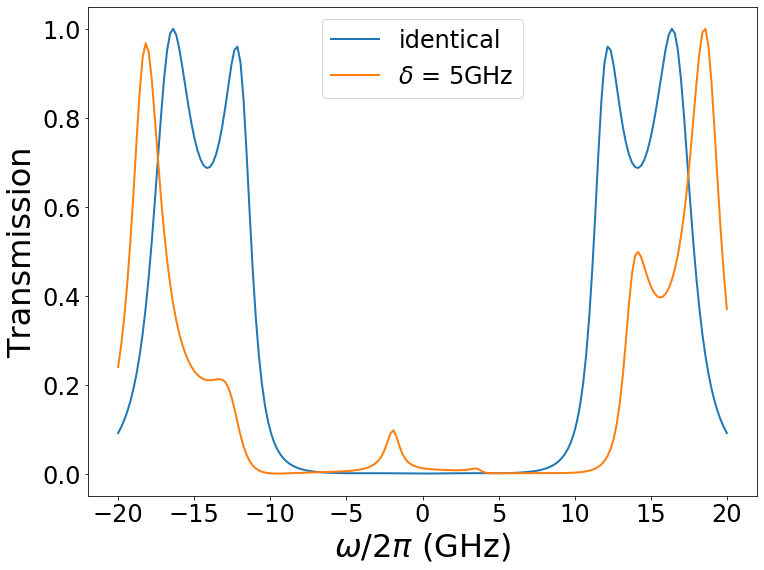

In [5]:
# spec_kappa = spec_kappa - min(spec_kappa)
# spec_kappa = spec_kappa/max(spec_kappa)

# spec_spread_kappa = spec_spread_kappa - min(spec_spread_kappa)
# spec_spread_kappa = spec_spread_kappa/max(spec_spread_kappa)

yesspread = np.loadtxt('spectrum_5kappa_yesspread', usecols = [1])
nospread = np.loadtxt('spectrum_5kappa_nospread', usecols = [1])
w_list = np.linspace(-20, 20, 200)
spread = 5

fig, cx = plt.subplots(1, 1, figsize=(12,9))
cx.plot(w_list, nospread, linewidth=2, label = 'identical')
cx.plot(w_list, yesspread, linewidth=2, label = '$\delta$ = {}GHz'.format(spread))
cx.tick_params(axis='both', which='major', labelsize=24)        
cx.set_xlabel('$\omega/2\pi$ (GHz)',fontsize = 32)
cx.set_ylabel('Transmission',fontsize = 32)

cx.legend(fontsize = 24, )

In [30]:
#single emitter
from qutip import *
import numpy as np
import matplotlib.pyplot as plt

In [5]:
cavdes = tensor(destroy(2), qeye(2))
empty = tensor(qeye(2), qeye(2))
s = []

sig1 = (tensor(qeye(2), destroy(2)))

s.append(tensor(sig1, empty))
s.append(tensor(empty, sig1))


a = []
a.append(tensor(cavdes, empty))
a.append(tensor(empty, cavdes))

In [65]:
we_list = [0,0,0,0]
we_list_spread = np.random.normal(0, scale = 5, size = 4)
g = 10
g_list = [g]*4
w_list = np.linspace(-20, 20, 200)
gamma = 0.1
J = 5
kappa = 5
spread = 5

In [66]:
H = J*(a[0].dag()*a[1] + a[1].dag()*a[0]) + g*(s[0].dag()*a[0] + a[0].dag()*s[0]) + g*(s[1].dag()*a[1] + a[1].dag()*s[1])
c_ops = [np.sqrt(kappa)*a[0], np.sqrt(kappa)*a[1], np.sqrt(gamma)*s[0], np.sqrt(gamma)*s[1], np.sqrt(kappa/50)*a[0].dag()]
spec = spectrum(H, w_list, c_ops, a[1].dag(), a[1])
spec = spec - min(spec)
spec = spec/max(spec)

In [67]:
np.savetxt('spectrum_5kappa_nospread_1em', np.transpose([w_list, spec]))

In [68]:
H_spread = we_list_spread[0]*(s[0].dag()*s[0]) + we_list_spread[1]*(s[1].dag()*s[1]) +  J*(a[0].dag()*a[1] + a[1].dag()*a[0]) + g*(s[0].dag()*a[0] + a[0].dag()*s[0]) + g*(s[1].dag()*a[1] + a[1].dag()*s[1])
c_ops = [np.sqrt(kappa)*a[0], np.sqrt(kappa)*a[1], np.sqrt(gamma)*s[0], np.sqrt(gamma)*s[1], np.sqrt(5/50)*a[0].dag()]
spec_spread = spectrum(H_spread, w_list, c_ops, a[1].dag(), a[1])
spec_spread = spec_spread - min(spec_spread)
spec_spread = spec_spread/max(spec_spread)

In [69]:
np.savetxt('spectrum_5kappa_yesspread_1em', np.transpose([w_list, spec_spread]))

In [1]:

yesspread = np.loadtxt('spectrum_5kappa_yesspread_1em', usecols = [1])
nospread = np.loadtxt('spectrum_5kappa_nospread_1em', usecols = [1])
w_list = np.linspace(-20, 20, 200)
spread = 5

fig, cx = plt.subplots(1, 1, figsize=(12,9))
cx.plot(w_list, nospread, linewidth=2, label = 'identical')
cx.plot(w_list, yesspread, linewidth=2, label = '$\delta$ = {}GHz'.format(spread))
cx.tick_params(axis='both', which='major', labelsize=24)        
cx.set_xlabel('$\omega/2\pi$ (GHz)',fontsize = 32)
cx.set_ylabel('Transmission',fontsize = 32)

cx.legend(fontsize = 24, loc = 'upper')

NameError: name 'np' is not defined

In [77]:
we_list = [0,0,0,0]
we_list_spread = np.random.normal(0, scale = 5, size = 4)
g = 10
g_list = [g]*4
w_list = np.linspace(-20, 20, 200)
gamma = 0.1
J = 5
kappa = 0
spread = 5

In [78]:
H = J*(a[0].dag()*a[1] + a[1].dag()*a[0]) + g*(s[0].dag()*a[0] + a[0].dag()*s[0]) + g*(s[1].dag()*a[1] + a[1].dag()*s[1])
c_ops = [np.sqrt(gamma)*s[0], np.sqrt(gamma)*s[1], np.sqrt(5/50)*a[0].dag()]
spec = spectrum(H, w_list, c_ops, a[1].dag(), a[1])
spec = spec - min(spec)
spec = spec/max(spec)

In [79]:
np.savetxt('spectrum_0kappa_nospread_1em', np.transpose([w_list, spec]))

In [80]:
H_spread = we_list_spread[0]*(s[0].dag()*s[0]) + we_list_spread[1]*(s[1].dag()*s[1]) +  J*(a[0].dag()*a[1] + a[1].dag()*a[0]) + g*(s[0].dag()*a[0] + a[0].dag()*s[0]) + g*(s[1].dag()*a[1] + a[1].dag()*s[1])
c_ops = [np.sqrt(gamma)*s[0], np.sqrt(gamma)*s[1], np.sqrt(5/50)*a[0].dag()]
spec_spread = spectrum(H_spread, w_list, c_ops, a[1].dag(), a[1])
spec_spread = spec_spread - min(spec_spread)
spec_spread = spec_spread/max(spec_spread)

In [81]:
np.savetxt('spectrum_0kappa_yesspread_1em', np.transpose([w_list, spec_spread]))

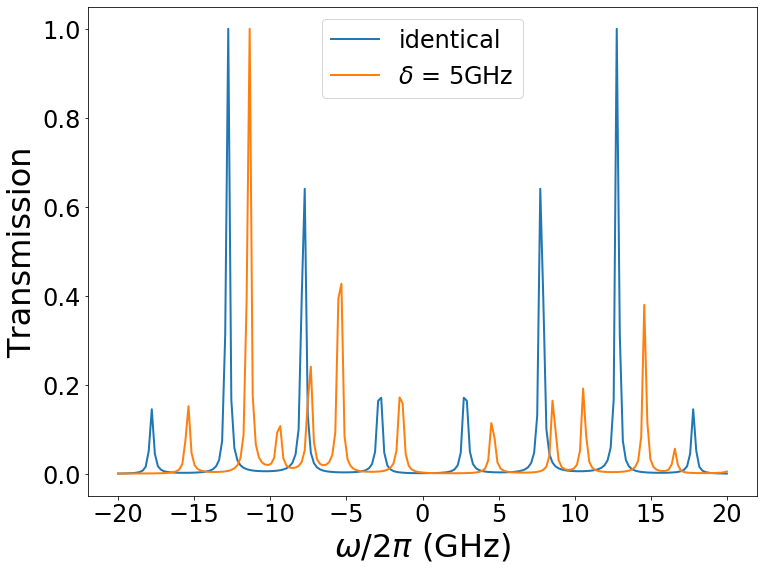

In [82]:

yesspread = np.loadtxt('spectrum_0kappa_yesspread_1em', usecols = [1])
nospread = np.loadtxt('spectrum_0kappa_nospread_1em', usecols = [1])
w_list = np.linspace(-20, 20, 200)
spread = 5

fig, cx = plt.subplots(1, 1, figsize=(12,9))
cx.plot(w_list, nospread, linewidth=2, label = 'identical')
cx.plot(w_list, yesspread, linewidth=2, label = '$\delta$ = {}GHz'.format(spread))
cx.tick_params(axis='both', which='major', labelsize=24)        
cx.set_xlabel('$\omega/2\pi$ (GHz)',fontsize = 32)
cx.set_ylabel('Transmission',fontsize = 32)

cx.legend(fontsize = 24, )